<a href="https://colab.research.google.com/github/jonatahpfg/Machine-learning-estudos/blob/main/Predi%C3%A7%C3%A3o_popularidade_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [316]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv('archive (7).zip')


In [317]:
df_sorted = df.sort_values('popularity', ascending=False)

# Identificar as músicas duplicadas com base nas colunas de critério de duplicidade
duplicated_songs = df_sorted.duplicated(subset=['track_name', 'artist_name'], keep='first')
df= df_sorted[~duplicated_songs]



In [318]:
df = df[df['popularity'] > 1]

In [319]:
artist_popularity_mean = df.groupby('artist_name')['popularity'].mean()

# Substitui o nome do artista pela média da popularidade, pois a popularidade do artista é um fator importante na predição do sucesso de uma
df['artist_name'] = df['artist_name'].map(artist_popularity_mean)


In [320]:
genre_mapping = {"Children's Music": 1,"A Capella": 2,"Movie": 3,"Opera": 4,"Comedy": 5,"Anime": 6,"Ska": 7,"Classical": 8,"Soundtrack": 9,"Blues": 10,"World": 11,
                 "Reggae": 12,"Reggaeton": 13,"Electronic": 14,"Jazz": 15,"Country": 16,"Soul": 17,"Folk": 18,"Alternative": 19,"R&B": 20,"Children's Music": 21,"Indie": 22,"Dance": 23,"Hip-Hop": 24,"Rock": 25,"Rap": 26, "Pop": 27}
#substitiuindo os gêneros por números, pois também é um fator importante na predição
df['genre'] = df['genre'].map(genre_mapping)




In [321]:
df=df.dropna()

In [322]:
x = df[['genre', 'artist_name', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]


y = df['popularity']
display(x)

,genre,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
9027,23.0,70.320988,0.5780,0.725,178640,0.3210,0.000000,0.0884,-10.744,0.3230,70.142,0.3190
86951,26.0,75.720930,0.1630,0.833,149520,0.5390,0.000002,0.1010,-7.399,0.1780,99.947,0.3850
107802,27.0,70.320988,0.0421,0.726,190440,0.5540,0.000000,0.1060,-5.290,0.0917,169.999,0.3350
66643,24.0,42.232227,0.1100,0.737,193227,0.8600,0.000002,0.0574,-2.652,0.0593,93.989,0.6560
107829,27.0,49.416667,0.0691,0.719,187436,0.7040,0.000000,0.1660,-4.724,0.0476,133.002,0.6280
...,...,...,...,...,...,...,...,...,...,...,...,...
55750,3.0,16.928571,0.9920,0.461,238227,0.0858,0.955000,0.2200,-25.710,0.0628,110.195,0.2670
75533,21.0,8.991124,0.9070,0.469,70547,0.1100,0.001040,0.1050,-16.555,0.0504,161.387,0.5200
195622,3.0,11.733333,0.3660,0.173,478307,0.1700,0.921000,0.0932,-18.599,0.0429,121.868,0.0624
105068,8.0,30.666667,0.8660,0.322,382867,0.2570,0.327000,0.3820,-15.018,0.0426,115.774,0.1850


In [323]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(model.score(x_test,y_test)*100,"%")


print(f"Coeficientes: {model.coef_}")

78.13028445787013 %
Coeficientes: [ 3.17012903e-01  8.76076078e-01  7.83289310e-01 -6.57144929e-01
  1.31644594e-06  7.33823693e-01  1.55510581e-01 -1.67638946e+00
  2.12297262e-02  4.90386572e-01 -4.86769904e-03 -7.39838557e-02]


In [324]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(x_train, y_train)

print(rfg_model.score(x_test, y_test)*100,"%")

80.297419726069 %


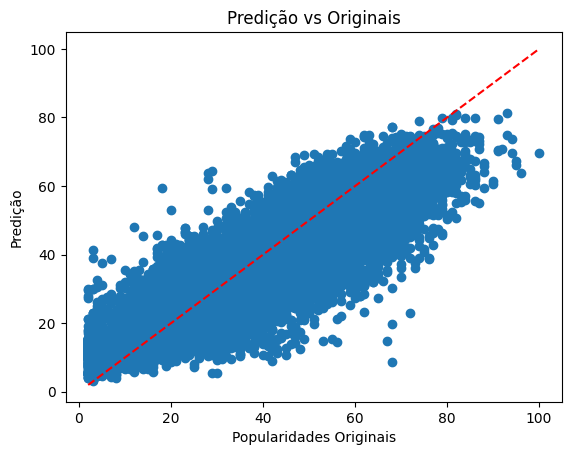

In [325]:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Popularidades Originais')
plt.ylabel('Predição')
plt.title('Predição vs Originais')
plt.show()

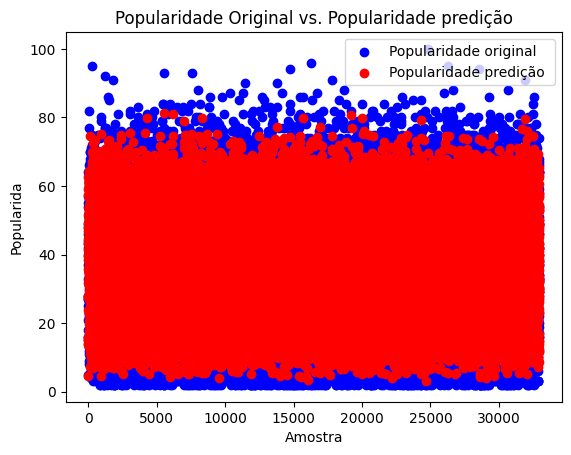

In [326]:
fig, ax = plt.subplots()

# Plotar os valores de y_test em azul (Popularidades originais )
ax.scatter(range(len(y_test)), y_test, color='blue', label='Popularidade original')

# Plotar os valores de y_pred em vermelho (predição)
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Popularidade predição ')



ax.set_xlabel('Amostra')
ax.set_ylabel('Popularida')
ax.set_title('Popularidade Original vs. Popularidade predição')
ax.legend()
plt.show()



